# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

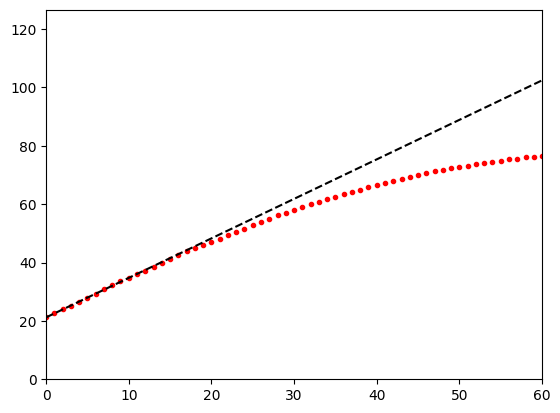

het vermogen is gelijk aan 4.46e+01
de theoretische energie op basis van de stijging aan het begin is 1.60e+05 J/kg
de energie die naar het water is gegaan is 1.09e+05 J/kg
de energie die overgegaan is in het gas is 4.51e+04 J/kg
de energie die over is gegaan naar het water is 1.55e+05 J/kg


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

df = pd.read_csv("Tempmetingen.csv",delimiter = ";")
Tijd = df["t (min)"].to_numpy()
Temperatuur= df["t (oC)"].to_numpy()

m_maatbeker = 0.8208
m_maatbekerenwater_start = 1.2929
m_maatbekerenwater_eind = 1.2749
m_water = m_maatbekerenwater_start-m_maatbeker
c_water = 4186

def func(T,P):
    return 21.2+(P*T*60)/(m_water*c_water)


popt,pcov = curve_fit(func,Tijd[:5],Temperatuur[:5])   

x1 = np.linspace(0,60,100)
y1 = func(x1, *popt)

plt.figure()
plt.plot(Tijd,Temperatuur,"r.")
plt.plot(x1,y1, 'k--')
plt.xlim(0,max(Tijd))
plt.ylim(0,max(Temperatuur)+50)
plt.show()
print("het vermogen is gelijk aan %.2e" %popt[0])
energie_gegeven = 60*60*popt[0]
print("de theoretische energie op basis van de stijging aan het begin is %.2e J/kg" %energie_gegeven)
energie_gekregen = ((76.6-21.2)/(max(y1)-21.2))*energie_gegeven #bereking op basis van temperatuur verschil
print("de energie die naar het water is gegaan is %.2e J/kg" %energie_gekregen)

energie_gas = 2506*(m_maatbekerenwater_start-m_maatbekerenwater_eind)*1000
print("de energie die overgegaan is in het gas is %.2e J/kg" %energie_gas)
print("de energie die over is gegaan naar het water is %.2e J/kg" %(energie_gas+energie_gekregen)) 
#de waarde

In [ ]:
# kan verbeteren door de hoeveelheid gas ook te meten en een isolerende beker te gebruiken
# door ook de warmte verandering van de maatbeker te meten
# de druk te meten
# metingen meerdere keren doen
# warmte verandering van omgeving te meten
